# Intern Name-Vishal Choudhary

# Task2: Prediction Using Unsupervised Machine Learning

### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

### Reading the dataset

In [2]:
df=datasets.load_iris()
df=pd.DataFrame(df.data, columns = df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

### Summary of the dataset

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To find outliers

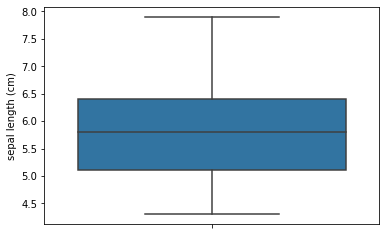

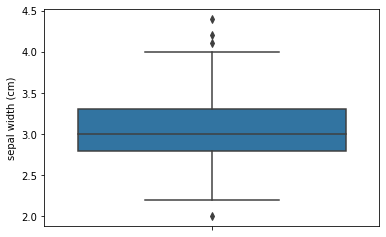

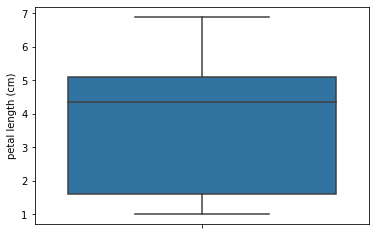

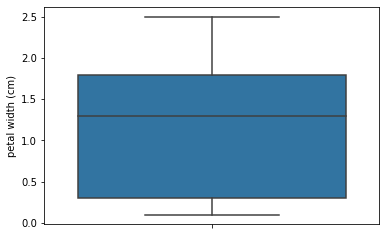

In [6]:
cols=df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [7]:
# To remove outliers from 'sepal width (cm)'
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
iqr=q3-q1
df=df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]

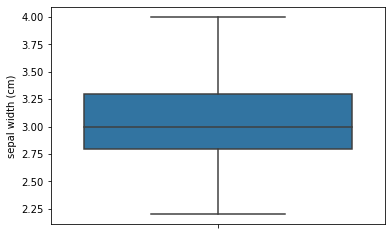

In [8]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

### Finding the optimum number of clusters for k-means classification

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss_inertia=kmeans.inertia_
    wcss.append(wcss_inertia)

C:\Users\visha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[655.6012328767129,
 143.89187500000008,
 73.47869237971102,
 53.26700546690307,
 42.51076241134753,
 36.62920546210549,
 31.865417508417515,
 28.396750432900422,
 26.964434928229682,
 25.265908144544355]

### Ploting elbow curve to find the no. of cluster

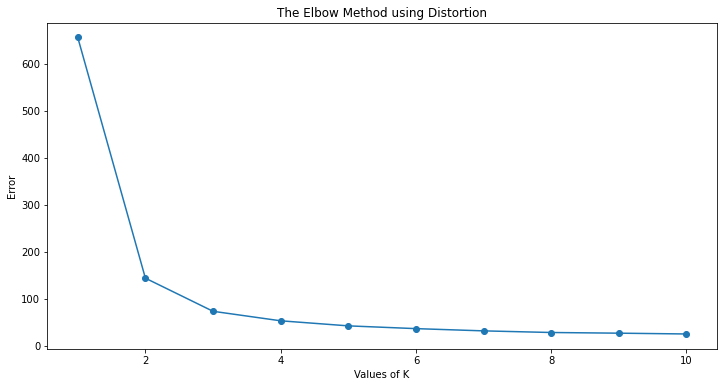

In [12]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
n=range(1,11)
plt.plot(n,wcss, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

## Optimum Number of clusters=3

In [13]:
kmeans=KMeans(n_clusters=3)
y_pred=kmeans.fit_predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
df['clusters']=y_pred

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [16]:
kmeans.cluster_centers_

array([[5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [4.97659574, 3.37659574, 1.46170213, 0.24680851],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualising the clusters - On the first two columns

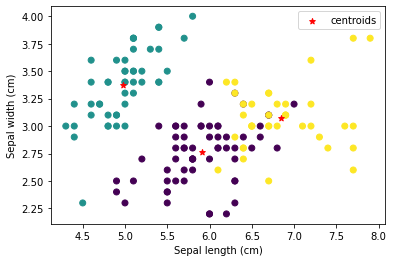

In [18]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['clusters'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='red',label='centroids')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()